In [1]:
import yfinance as yf
import pandas as pd

# Define the stock ticker and a RECENT date range
ticker = 'AAPL'
start_date = '2025-07-15' # A date within the last ~45 days
end_date = '2025-08-31'   # Today's date

# Download the stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Save the data to a CSV file for later use
stock_data.to_csv('AAPL_stock_data.csv')

print(f"\nSuccessfully saved RECENT stock data to AAPL_stock_data.csv")
print(stock_data.head())

C:\Users\PRIYESH PRIYAM\AppData\Local\Temp\ipykernel_19476\3497478014.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Successfully saved RECENT stock data to AAPL_stock_data.csv
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-07-15  208.872955  211.649803  208.683168  208.982831  42296300
2025-07-16  209.921768  212.159219  208.403487  210.061609  47490500
2025-07-17  209.781921  211.559902  209.352401  210.331301  48068100
2025-07-18  210.940598  211.549907  209.462280  210.630951  48974600
2025-07-21  212.239120  215.535383  211.390093  211.859562  51377400


In [2]:
import requests
import pandas as pd

# --- IMPORTANT: REPLACE WITH YOUR KEY ---
API_KEY = '5a42f5394890421999a52cf3c6dc8bc4' 
# -----------------------------------------

company_name = 'Apple'
search_query = f'{company_name} stock'
# We'll fetch news from the last month (the limit of the free API)
from_date = '2025-08-01' # Adjust this to be within the last 30 days

url = (f'https://newsapi.org/v2/everything?'
       f'q={search_query}&'
       f'from={from_date}&'
       f'language=en&'
       f'sortBy=publishedAt&'
       f'apiKey={API_KEY}')

response = requests.get(url)
data = response.json()

# Check if the request was successful
if data['status'] == 'ok':
    articles = data['articles']
    
    # Process and store the relevant data
    news_list = []
    for article in articles:
        # Extracting just the date part from the timestamp
        published_date = pd.to_datetime(article['publishedAt']).strftime('%Y-%m-%d')
        news_list.append({'date': published_date, 
                            'title': article['title'], 
                            'content': article['description']})
    
    news_df = pd.DataFrame(news_list)
    
    print("News Data:")
    print(news_df.head())
    
    # Save the news data to a CSV file
    news_df.to_csv('AAPL_news_data.csv', index=False)
    
    print(f"\nSuccessfully saved {len(news_df)} articles to AAPL_news_data.csv")
else:
    print("Failed to fetch news. Error:", data.get('message', 'Unknown error'))

News Data:
         date                                              title  \
0  2025-08-30  Quantbot Technologies LP Raises Stock Holdings...   
1  2025-08-30  Pioneer Trust Bank N A OR Cuts Holdings in App...   
2  2025-08-30  Fortress Financial Solutions LLC Increases Sta...   
3  2025-08-30  Cohen Capital Management Inc. Sells 2,100 Shar...   
4  2025-08-30  Trail Ridge Investment Advisors LLC Trims Stak...   

                                             content  
0  Quantbot Technologies LP increased its positio...  
1  Pioneer Trust Bank N A OR lowered its position...  
2  Fortress Financial Solutions LLC increased its...  
3  Cohen Capital Management Inc. cut its position...  
4  Trail Ridge Investment Advisors LLC cut its po...  

Successfully saved 99 articles to AAPL_news_data.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
stock_data = pd.read_csv('AAPL_stock_data.csv', index_col=0, parse_dates=True)
stock_data.index.name = 'Date'
news_data = pd.read_csv('AAPL_news_data.csv')

# --- FIX: REMOVED 'Adj Close' FROM THE LIST ---
# This list now matches the standard column names from yfinance
cols_to_convert = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in cols_to_convert:
    stock_data[col] = pd.to_numeric(stock_data[col], errors='coerce')

# Drop any rows that might have missing values after conversion
stock_data.dropna(inplace=True)
# --------------------------------------------------

# --- PREPARE THE TARGET VARIABLE ---
stock_data['Price_Change'] = stock_data['Close'].diff()
stock_data['Target'] = (stock_data['Price_Change'].shift(-1) > 0).astype(int)
stock_data = stock_data.dropna(subset=['Target'])

print("Stock data with Target variable:")
print(stock_data.head())
print("\nData types after cleaning:")
print(stock_data.dtypes)

Stock data with Target variable:
                 Close        High         Low        Open      Volume  \
Date                                                                     
2025-07-15  208.872955  211.649803  208.683168  208.982831  42296300.0   
2025-07-16  209.921768  212.159219  208.403487  210.061609  47490500.0   
2025-07-17  209.781921  211.559902  209.352401  210.331301  48068100.0   
2025-07-18  210.940598  211.549907  209.462280  210.630951  48974600.0   
2025-07-21  212.239120  215.535383  211.390093  211.859562  51377400.0   

            Price_Change  Target  
Date                              
2025-07-15           NaN       1  
2025-07-16      1.048813       0  
2025-07-17     -0.139847       1  
2025-07-18      1.158676       1  
2025-07-21      1.298523       1  

Data types after cleaning:
Close           float64
High            float64
Low             float64
Open            float64
Volume          float64
Price_Change    float64
Target            int64
dtype: 

C:\Users\PRIYESH PRIYAM\AppData\Local\Temp\ipykernel_19476\9322473.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stock_data = pd.read_csv('AAPL_stock_data.csv', index_col=0, parse_dates=True)


C:\Users\PRIYESH PRIYAM\AppData\Local\Temp\ipykernel_19476\3077036360.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stock_data.index = pd.to_datetime(stock_data.index, errors='coerce')


✅ Step 3.1: Stock data loaded and cleaned successfully.
✅ Step 3.2: News data loaded and aggregated successfully.

Data types right before merge:
Stock data index type: datetime64[ns]
Daily news 'date' column type: datetime64[ns]

✅ Step 3.3: Merge successful!
                 Close                                              title  \
date                                                                        
2025-08-28  232.559998  Affirm's stock soars 15% on earnings, revenue ...   
2025-08-29  232.139999  Apple Inc. (AAPL): The AI “Will Come Into Play...   

            Target  
date                
2025-08-28       0  
2025-08-29       0  


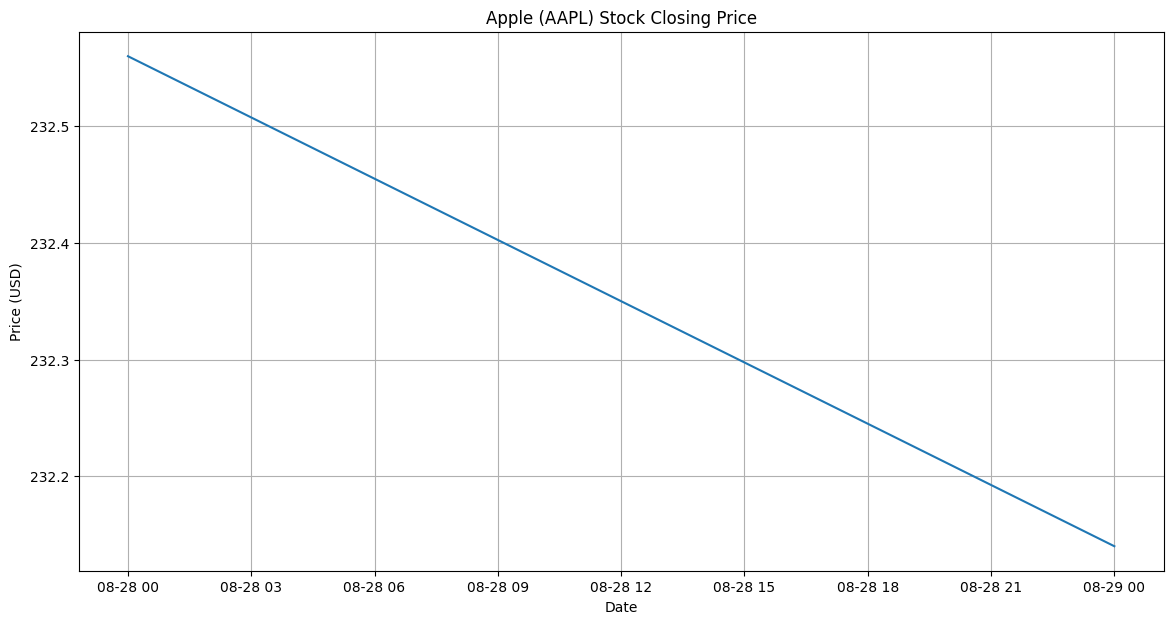

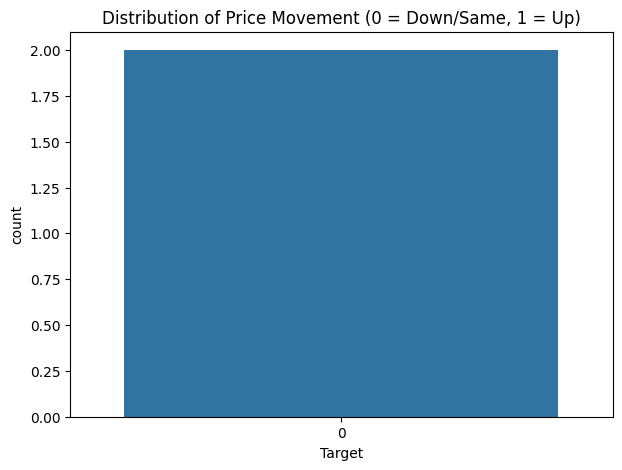


✅ Step 3.4: Plots generated successfully.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 3.1: LOAD AND CLEAN STOCK DATA ---
try:
    stock_data = pd.read_csv('AAPL_stock_data.csv', index_col=0)
    
    # --- CRITICAL FIX: EXPLICITLY CONVERT THE INDEX TO DATETIME ---
    stock_data.index = pd.to_datetime(stock_data.index, errors='coerce')
    stock_data.dropna(inplace=True) # Remove rows if date conversion failed
    # -------------------------------------------------------------

    stock_data.index.name = 'Date'
    
    cols_to_convert = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in cols_to_convert:
        stock_data[col] = pd.to_numeric(stock_data[col], errors='coerce')
    stock_data.dropna(inplace=True)
    
    stock_data['Price_Change'] = stock_data['Close'].diff()
    stock_data['Target'] = (stock_data['Price_Change'].shift(-1) > 0).astype(int)
    stock_data = stock_data.dropna(subset=['Target'])
    print("✅ Step 3.1: Stock data loaded and cleaned successfully.")
except Exception as e:
    print(f"❌ Error in Step 3.1: {e}")


# --- STEP 3.2: LOAD AND AGGREGATE NEWS DATA ---
try:
    news_data = pd.read_csv('AAPL_news_data.csv')
    news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce')
    news_data.dropna(subset=['date'], inplace=True) 
    
    daily_news = news_data.groupby('date')['title'].apply(' '.join).reset_index()
    print("✅ Step 3.2: News data loaded and aggregated successfully.")
except Exception as e:
    print(f"❌ Error in Step 3.2: {e}")


# --- FINAL CHECK AND MERGE ---
if daily_news.empty:
    print("\n‼️ WARNING: The 'daily_news' DataFrame is empty.")
    print("This means no news articles were found for the dates in your stock data.")
else:
    print("\nData types right before merge:")
    print(f"Stock data index type: {stock_data.index.dtype}")
    print(f"Daily news 'date' column type: {daily_news['date'].dtype}")
    
    try:
        # --- STEP 3.3: MERGE ---
        merged_data = pd.merge(stock_data, daily_news, left_index=True, right_on='date', how='inner')
        merged_data.set_index('date', inplace=True)
        print("\n✅ Step 3.3: Merge successful!")
        print(merged_data[['Close', 'title', 'Target']].head())
        
        # --- STEP 3.4: PLOTTING ---
        plt.figure(figsize=(14, 7))
        plt.plot(merged_data['Close'])
        plt.title('Apple (AAPL) Stock Closing Price')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.grid(True)
        plt.show()

        plt.figure(figsize=(7, 5))
        sns.countplot(x='Target', data=merged_data)
        plt.title('Distribution of Price Movement (0 = Down/Same, 1 = Up)')
        plt.show()
        print("\n✅ Step 3.4: Plots generated successfully.")

    except Exception as e:
        print(f"\n❌ An error occurred during the merge or plotting: {e}")

In [5]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from tqdm import tqdm

# Initialize the FinBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('ProsusAI/finbert')
model = AutoModelForSequenceClassification.from_pretrained('ProsusAI/finbert')

# We need to apply TQDM to pandas to see a progress bar
tqdm.pandas()

# Define a function to get the sentiment score
def get_sentiment(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
    with torch.no_grad():
        logits = model(**inputs).logits
    probabilities = torch.nn.functional.softmax(logits, dim=-1)
    positive = probabilities[0][0].item()
    negative = probabilities[0][1].item()
    score = positive - negative
    return score

# Apply the function to the 'title' column with a progress bar
merged_data['sentiment_score'] = merged_data['title'].progress_apply(get_sentiment)

print("Data with Sentiment Score:")
print(merged_data[['title', 'sentiment_score']].head())

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.14it/s]

Data with Sentiment Score:
                                                        title  sentiment_score
date                                                                          
2025-08-28  Affirm's stock soars 15% on earnings, revenue ...         0.034287
2025-08-29  Apple Inc. (AAPL): The AI “Will Come Into Play...        -0.163682


In [6]:
# --- Simple Moving Average (SMA) ---
merged_data['SMA_3'] = merged_data['Close'].rolling(window=3).mean()

# --- Relative Strength Index (RSI) ---
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

merged_data['RSI_14'] = calculate_rsi(merged_data)

# --- Handle Missing Values ---
merged_data.fillna(merged_data.mean(numeric_only=True), inplace=True)

print("\nFinal dataset with all features:")
print(merged_data[['Close', 'Target', 'sentiment_score', 'SMA_3', 'RSI_14']].head())


Final dataset with all features:
                 Close  Target  sentiment_score  SMA_3  RSI_14
date                                                          
2025-08-28  232.559998       0         0.034287    NaN     NaN
2025-08-29  232.139999       0        -0.163682    NaN     NaN


In [7]:
# Define our features (X) and target (y)
features = ['sentiment_score', 'SMA_3', 'RSI_14']
target = 'Target'

X = merged_data[features]
y = merged_data[target]

In [8]:
# Calculate the split point
train_size = int(len(X) * 0.8)

# Split the data
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training set size: {len(X_train)} rows")
print(f"Testing set size: {len(X_test)} rows")

Training set size: 1 rows
Testing set size: 1 rows


In [9]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the XGBoost model
# We use 'use_label_encoder=False' and 'eval_metric='logloss'' to avoid common warnings
model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

# Train the model on the training data
model.fit(X_train, y_train)

print("✅ XGBoost Model trained successfully!")

C:\Users\PRIYESH PRIYAM\Desktop\Stock_Sentiment_Project\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:17:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoostError: [14:17:47] C:\actions-runner\_work\xgboost\xgboost\src\objective\./regression_loss.h:68: Check failed: base_score > 0.0f && base_score < 1.0f: base_score must be in (0,1) for logistic loss, got: 0

In [10]:
print("Unique values in the training target (y_train):")
print(y_train.unique())

Unique values in the training target (y_train):
[0]


In [11]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# --- Classification Report ---
# This shows key metrics like precision and recall
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, zero_division=0))

# --- Confusion Matrix ---
# This visually shows correct vs. incorrect predictions
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

NotFittedError: need to call fit or load_model beforehand